In [0]:
!git clone https://github.com/Fatemeh-MA/Face-recognition-using-CNN.git

Cloning into 'Face-recognition-using-CNN'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Unpacking objects: 100% (36/36), done.


In [0]:
!unzip /content/Face-recognition-using-CNN/ORL_faces.zip

Archive:  /content/Face-recognition-using-CNN/ORL_faces.zip
  inflating: ORL_faces.npz           


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

Using TensorFlow backend.


In [0]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train shape : {}'.format(x_train.shape))
print('Y-train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape : (240, 10304)
Y-train shape: (240,)
x_test shape: (160, 10304)


In [0]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [0]:

im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [0]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [0]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2024)              49841000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2024)             

In [0]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

In [0]:
!unzip "/content/drive/My Drive/VN-celeb.zip"

In [0]:
a = cnn_model.predict(x_train[0:1])


array([0.04566153, 0.05496646, 0.04683832, 0.04789285, 0.04765241,
       0.05053843, 0.05414236, 0.04838559, 0.0557059 , 0.0517946 ,
       0.04912042, 0.05057444, 0.05333339, 0.05002162, 0.04814414,
       0.05513422, 0.04720539, 0.05485893, 0.04451752, 0.04351149],
      dtype=float32)

## prepare data

In [0]:
import shutil
import os
a = []
path = r"/content/VN-celeb"
save_path = r'/content/drive/My Drive/face_images'

for f in os.listdir(path):
  fp = os.path.join(path, f)
  if len(os.listdir(fp)) > 48:
    save = os.path.join(save_path, f)
    shutil.copytree(fp, save)

In [0]:
!zip -r face_data.zip "/content/drive/My Drive/face_images" 

(182, 182)


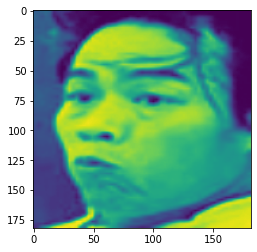

In [0]:
import cv2
import matplotlib.pyplot as plt


# todo: read data, resize, to grayscale
img_path = "/content/drive/My Drive/face_images/11/4.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img)
plt.show()

(128, 128)


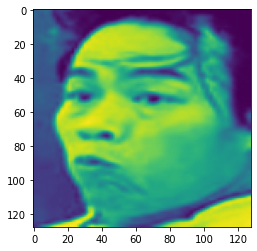

In [0]:
img2 = cv2.resize(img, (128, 128))
print(img2.shape)
plt.imshow(img2)
plt.show()